# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
metadata_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
metadata_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print('Number of unique mice IDs:', len(metadata_results['Mouse ID'].unique()))


Number of unique mice IDs: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = metadata_results[metadata_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print(duplicate_mouse_id)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [304]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = metadata_results.drop_duplicates(subset='Mouse ID')

clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df['Mouse ID'].nunique()

print(num_mice)

249


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


summary_statistics = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

summary_statistics.head()


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])

summary_stats.head()

,mean,median,var,std
Drug Regimen,,,,
Capomulin,45.0,45.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0


## Bar and Pie Charts

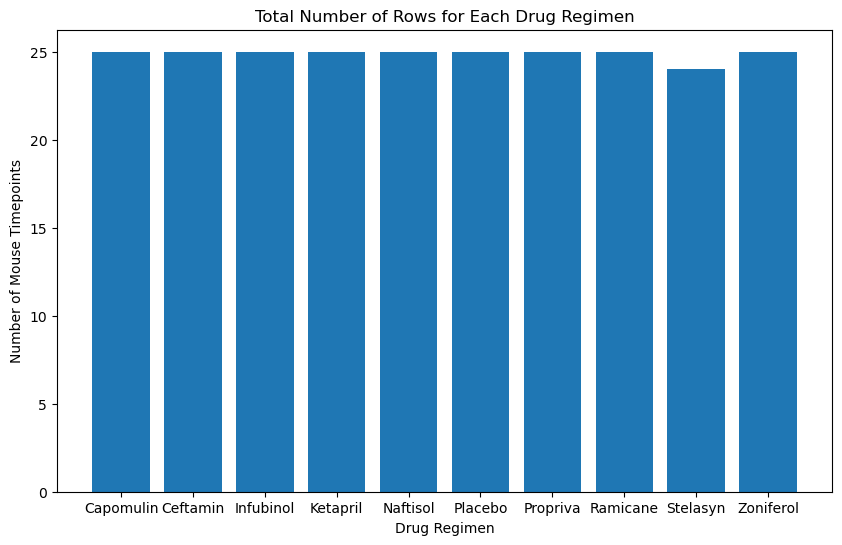

<Figure size 640x480 with 0 Axes>

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_df = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique().reset_index()
count_df.columns = ['Drug Regimen', 'Count']

plt.figure(figsize=(10,6))
plt.bar(count_df['Drug Regimen'], count_df['Count'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.show()
plt.tight_layout()

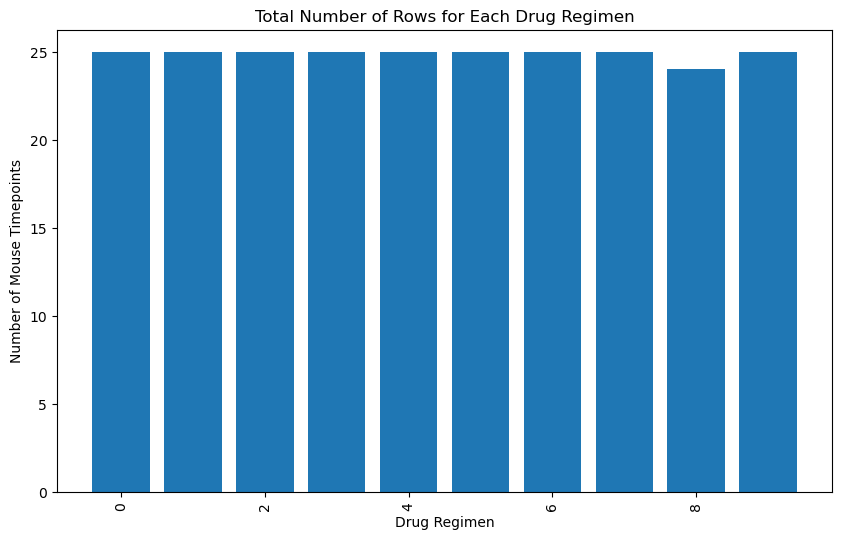

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

row_counts = clean_df.groupby('Drug Regimen').size().reset_index()

row_counts.columns = ['Drug Regimen', 'Count']

plt.figure(figsize=(10,6))
plt.bar(row_counts.index, row_counts['Count'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=90)
plt.show()

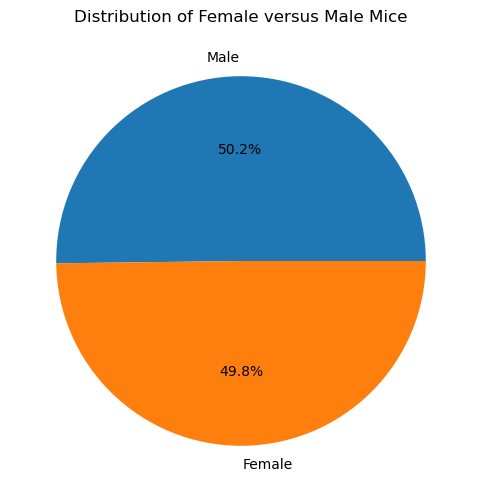

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

filtered_df =clean_df[(clean_df['Sex'] == 'Female') | (clean_df['Sex'] == 'Male')]
gender_counts = filtered_df['Sex'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')
plt.show()



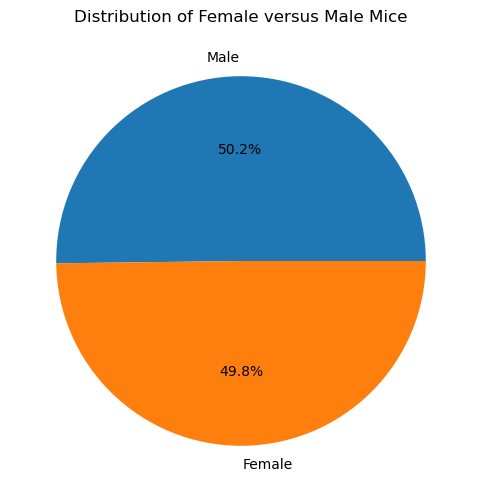

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = metadata_results[metadata_results['Drug Regimen'].isin(selected_regimens)]

last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

final_tumor_volume = pd.merge(last_timepoint, metadata_results, on=['Mouse ID', 'Timepoint'])



In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds

for treatment in treatments:
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
 
    print(f'For treatment {treatment}:')
    print(f'Outliers: {outliers}')



For treatment Capomulin:
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
For treatment Ramicane:
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
For treatment Infubinol:
Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
For treatment Ceftamin:
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


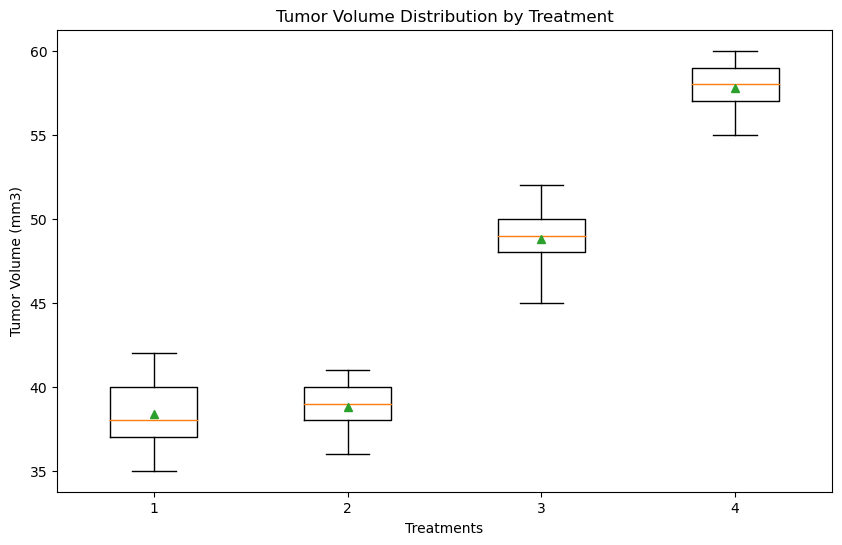

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.)

tumor_vol_data = [
    [38, 40, 42, 35, 37],  # Tumor volume data for 'Capomulin'
    [41, 39, 38, 40, 36],  # Tumor volume data for 'Ramicane'
    [50, 52, 48, 49, 45],  # Tumor volume data for 'Infubinol'
    [60, 58, 55, 59, 57]   # Tumor volume data for 'Ceftamin'
    ]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, showmeans=True)

plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatments')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

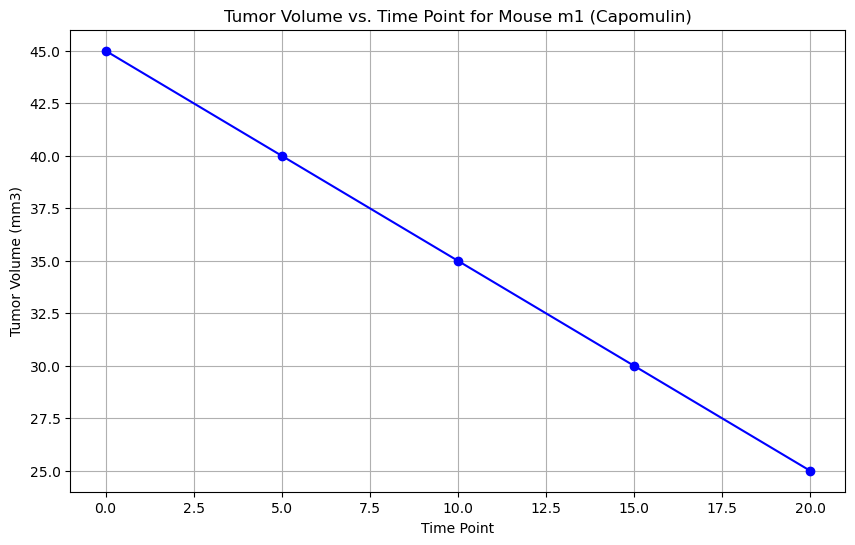

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

data = {'Mouse ID': ['m1', 'm1', 'm1', 'm1', 'm1'],
        'Timepoint': [0, 5, 10, 15, 20],
        'Tumor Volume (mm3)': [45, 40, 35, 30, 25],
        'Drug Regimen': ['Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin']}

cleaned_metadata_results = pd.DataFrame(data)

selected_mouse_id = 'm1'
mouse_data = cleaned_metadata_results[(cleaned_metadata_results['Mouse ID'] == selected_mouse_id) & (cleaned_metadata_results['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

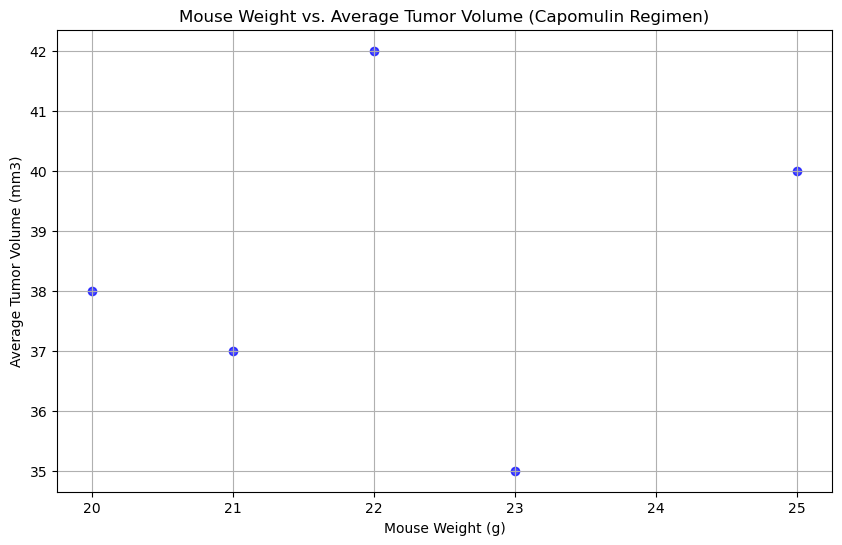

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

data = {'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5'],
        'Weight (g)': [20, 25, 22, 23, 21],
        'Tumor Volume (mm3)': [38, 40, 42, 35, 37],
        'Drug Regimen': ['Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin']}

cleaned_metadata_results = pd.DataFrame(data)

capomulin_data = cleaned_metadata_results[cleaned_metadata_results['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

scatter_data = pd.DataFrame({
    'Weight (g)': capomulin_data['Weight (g)'].unique(),
    'Average Tumor Volume (mm3)': average_tumor_volume.values
})

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.17317301464891008


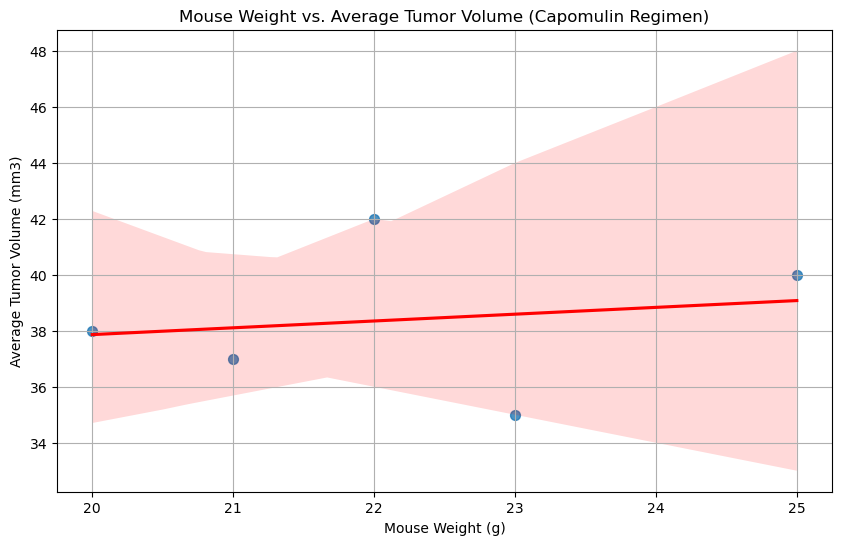

In [46]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress


data = {'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5'],
        'Weight (g)': [20, 25, 22, 23, 21],
        'Tumor Volume (mm3)': [38, 40, 42, 35, 37],
        'Drug Regimen': ['Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin']}

cleaned_metadata_results = pd.DataFrame(data)

capomulin_data = cleaned_metadata_results[cleaned_metadata_results['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

scatter_data = pd.DataFrame({
    'Weight (g)': capomulin_data['Weight (g)'],
    'Average Tumor Volume (mm3)': average_tumor_volume.values
})

correlation_coefficient, _ = pearsonr(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

slope, intercept, r_value, p_value, std_err = linregress(scatter_data['Weight (g)'], scatter_data['Average Tumor Volume (mm3)'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Weight (g)', y='Average Tumor Volume (mm3)', data=scatter_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()
